In [3312]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3266]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [3267]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [3268]:
len(df_validation['equipment_id'].unique())

174

In [3269]:
df_model.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'ServiceDateTime',
       'Unnamed: 0', 'Unnamed: 0.1', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Lat', 'Lon',
       'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap', 'Boards', 'Alights',
       'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second',
       'Date', 'Daytype', 'time', 'geometry', 'dist', 'Speed', 'Acceleration',
       'time_delta', 'time_delta_in_seconds', 'Powertrain', 'VehicleModel',
       'Vehicle_mass', 'Energy'],
      dtype='object')

In [3270]:
len(df_model['Vehicle'].unique())

178

In [3271]:
len(df_validation['date'].unique())

30

In [3272]:
len(df_model['Date'].unique())

30

In [3273]:
validation_vehicles=df_validation['equipment_id'].unique()

In [3274]:
df_model_filtered=df_model.loc[df_model.Vehicle.isin(validation_vehicles)]

In [3275]:
df_model['Date']=pd.to_datetime(df_model['Date'])

In [3276]:
df_model_filtered

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,ServiceDateTime,Unnamed: 0,Unnamed: 0.1,DateKey,CalendarDate,Year,Month,...,geometry,dist,Speed,Acceleration,time_delta,time_delta_in_seconds,Powertrain,VehicleModel,Vehicle_mass,Energy
2391,1297419,1297419,2391,2022-04-29 14:01:44,2391,1273034,8788,2022-04-29 00:00:00.000,2022,4,...,POINT (-72.52602 42.14098),0.000000,0.000000,0.000000,0,0.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,0.000000
2392,1299038,1299038,2392,2022-04-29 14:28:20,2392,1273037,8788,2022-04-29 00:00:00.000,2022,4,...,POINT (-72.65278 42.19514),8.829565,32.052117,0.005579,0 days 00:26:36,1596.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,7.899773
2393,1299039,1299039,2393,2022-04-29 14:28:20,2393,1273500,8788,2022-04-29 00:00:00.000,2022,4,...,POINT (-72.65278 42.19514),0.000000,0.000000,0.000000,0 days 00:00:00,0.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,0.000000
2394,1299250,1299250,2394,2022-04-29 14:30:55,2394,1273501,8788,2022-04-29 00:00:00.000,2022,4,...,POINT (-72.64553 42.20302),0.526585,19.682810,0.035274,0 days 00:02:35,155.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,0.644165
2395,1299272,1299272,2395,2022-04-29 14:31:09,2395,1273502,8788,2022-04-29 00:00:00.000,2022,4,...,POINT (-72.64369 42.20166),0.130185,53.874613,0.678410,0 days 00:00:14,14.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,1.276279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361544,1361526,1361526,1361544,2022-04-30 23:54:20,1361544,1325566,8789,2022-04-30 00:00:00.000,2022,4,...,POINT (-72.53185 42.38201),0.254140,10.517075,0.003673,0 days 00:02:20,140.0,conventional,0,26900.0,0.070429
1361545,1361530,1361530,1361545,2022-04-30 23:55:24,1361545,1325567,8789,2022-04-30 00:00:00.000,2022,4,...,POINT (-72.5327 42.375),0.156799,14.194300,0.015960,0 days 00:01:04,64.0,conventional,0,26900.0,0.034941
1361546,1361539,1361539,1361546,2022-04-30 23:56:47,1361546,1325568,8789,2022-04-30 00:00:00.000,2022,4,...,POINT (-72.53357 42.36864),0.144950,10.117888,-0.013643,0 days 00:01:23,83.0,conventional,0,26900.0,0.039990
1361547,1361541,1361541,1361547,2022-04-30 23:57:32,1361547,1325569,8789,2022-04-30 00:00:00.000,2022,4,...,POINT (-72.53556 42.3656),0.151259,19.474153,0.057755,0 days 00:00:45,45.0,conventional,0,26900.0,0.030324


In [3277]:
df_model_filtered = df_model_filtered.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'] ,'Powertrain': ['max'], 'dist': ['sum']}).reset_index()

In [3278]:
df_model_filtered

,Vehicle,Date,Energy,Powertrain,dist
,,,sum,max,sum
0,1320,2022-04-29,52.554287,electric,38.462541
1,1321,2022-04-01,12.061448,electric,9.615819
2,1321,2022-04-04,21.375129,electric,11.612397
3,1321,2022-04-05,39.627568,electric,25.229515
4,1321,2022-04-06,1.428367,electric,7.551147
...,...,...,...,...,...
3005,7902,2022-04-26,12.061720,conventional,52.211481
3006,7902,2022-04-27,19.410773,conventional,86.274257
3007,7902,2022-04-28,42.760604,conventional,70.515202


In [3279]:
df_model_filtered['Energy']

,sum
0,52.554287
1,12.061448
2,21.375129
3,39.627568
4,1.428367
...,...
3005,12.061720
3006,19.410773
3007,42.760604
3008,44.283616


In [3280]:
model_vehicles=df_model['Vehicle'].unique()

In [3281]:
df_validation_filtered=df_validation.loc[df_validation.equipment_id.isin(model_vehicles)]

In [3282]:
len(df_validation_filtered.equipment_id.unique())

171

In [3283]:
df_validation_filtered

,Unnamed: 0,timestamp,equipment_id,gallons,date
0,58949,2022-04-01 18:59:00,3212,10.1,2022-04-01
1,59065,2022-04-07 01:01:00,3212,29.3,2022-04-07
2,59092,2022-04-08 05:33:00,3212,52.0,2022-04-08
3,59100,2022-04-08 23:20:00,3212,25.1,2022-04-08
4,59125,2022-04-10 05:38:00,3212,54.1,2022-04-10
...,...,...,...,...,...
2948,4682,2022-04-26 19:12:00,7816,51.6,2022-04-26
2949,4683,2022-04-27 20:39:00,7816,19.3,2022-04-27
2950,4684,2022-04-28 14:02:00,7816,14.0,2022-04-28
2951,4685,2022-04-29 19:10:00,7816,18.4,2022-04-29


In [3284]:
#df_validation_filtered=df_validation_filtered[df_validation_filtered['gallons']<70]

In [3285]:
df_validation_filtered['gallons'].mean()

29.053083730428856

In [3286]:
df_validation_filtered['gallons'].median()

30.0

In [3287]:
df_validation_filtered['gallons'].max()

84.79

In [3288]:
df_validation_filtered = df_validation_filtered.groupby(['equipment_id', 'date']).agg({'gallons': ['sum']}).reset_index()

In [3289]:
df_validation_filtered

,equipment_id,date,gallons
,,,sum
0,1320,2022-04-27,0.68
1,1320,2022-04-29,0.69
2,1321,2022-04-18,1.83
3,1321,2022-04-19,0.58
4,1321,2022-04-29,0.66
...,...,...,...
2719,7902,2022-04-25,59.70
2720,7902,2022-04-26,12.20
2721,7902,2022-04-27,23.80


In [3290]:
df_validation_filtered.rename(
    columns={"equipment_id":"Vehicle",
                "date":"Date",
                "gallons":"Real_Energy"}
          ,inplace=True)

In [3291]:
cols = ['Vehicle', 'Date']
df_integrated=df_model_filtered.join(df_validation_filtered.set_index(cols), on=cols)

In [3292]:
df_integrated

,Vehicle,Date,Energy,Powertrain,dist,Real_Energy
,,,sum,max,sum,sum
0,1320,2022-04-29,52.554287,electric,38.462541,0.69
1,1321,2022-04-01,12.061448,electric,9.615819,NaN
2,1321,2022-04-04,21.375129,electric,11.612397,NaN
3,1321,2022-04-05,39.627568,electric,25.229515,NaN
4,1321,2022-04-06,1.428367,electric,7.551147,NaN
...,...,...,...,...,...,...
3005,7902,2022-04-26,12.061720,conventional,52.211481,12.20
3006,7902,2022-04-27,19.410773,conventional,86.274257,23.80
3007,7902,2022-04-28,42.760604,conventional,70.515202,NaN


In [3297]:
df_integrated.columns

Index(['Vehicle', 'Date', 'Energy', 'Powertrain', 'Distance', 'Real_Energy'], dtype='object')

In [3294]:
df_integrated.columns = df_integrated.columns.droplevel()

In [3295]:
df_integrated.columns =['Vehicle', 'Date', 'Energy', 'Powertrain', 'Distance', 'Real_Energy']

In [3296]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy
0,1320,2022-04-29,52.554287,electric,38.462541,0.69
1,1321,2022-04-01,12.061448,electric,9.615819,NaN
2,1321,2022-04-04,21.375129,electric,11.612397,NaN
3,1321,2022-04-05,39.627568,electric,25.229515,NaN
4,1321,2022-04-06,1.428367,electric,7.551147,NaN
...,...,...,...,...,...,...
3005,7902,2022-04-26,12.061720,conventional,52.211481,12.20
3006,7902,2022-04-27,19.410773,conventional,86.274257,23.80
3007,7902,2022-04-28,42.760604,conventional,70.515202,NaN
3008,7902,2022-04-29,44.283616,conventional,87.448258,19.00


In [3298]:
df_integrated.columns.nlevels 

1

In [3299]:
df_integrated['Real_Energy'].isna().sum()

482

In [3300]:
df_integrated['Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Energy']

In [3301]:
df_integrated['Real_Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Real_Energy']

In [3302]:
df_integrated=df_integrated.dropna()

In [3303]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
0,1320,2022-04-29,52.554287,electric,38.462541,0.69,0.731863,55.742813
7,1321,2022-04-18,117.594541,electric,81.710409,1.83,0.694849,44.650497
8,1321,2022-04-19,134.813781,electric,79.449076,0.58,0.589325,136.981166
14,1321,2022-04-29,60.362156,electric,50.051221,0.66,0.829182,75.835183
20,1322,2022-04-18,23.791023,electric,12.497164,0.96,0.525289,13.017879
...,...,...,...,...,...,...,...,...
3004,7902,2022-04-25,16.465691,conventional,70.396083,59.70,4.275319,1.179164
3005,7902,2022-04-26,12.061720,conventional,52.211481,12.20,4.328693,4.279630
3006,7902,2022-04-27,19.410773,conventional,86.274257,23.80,4.444659,3.624969
3008,7902,2022-04-29,44.283616,conventional,87.448258,19.00,1.974732,4.602540


In [3211]:
#df_integrated['Real_Fuel/energy_economy'][df_integrated['Real_Fuel/energy_economy'] > 20] = 20

In [3212]:
#df_integrated['Real_Fuel/energy_economy'].hist()

In [3304]:
df_hybrid=df_integrated.loc[df_integrated['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated.loc[df_integrated['Powertrain'] == 'conventional'].copy()

In [3214]:
df_hybrid

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
1197,1801,2022-04-01,16.774066,hybrid,152.778852,50.91,9.108039,3.000960
1198,1801,2022-04-02,19.135948,hybrid,168.948906,60.73,8.828875,2.781968
1200,1801,2022-04-07,1.252419,hybrid,10.000853,5.89,7.985228,1.697938
1201,1801,2022-04-08,28.536266,hybrid,156.441346,33.53,5.482194,4.665713
1202,1801,2022-04-09,19.130675,hybrid,138.727266,23.54,7.251562,5.893257
...,...,...,...,...,...,...,...,...
2985,7901,2022-04-26,24.805519,hybrid,141.151438,20.00,5.690324,7.057572
2986,7901,2022-04-27,11.756282,hybrid,70.485221,40.10,5.995537,1.757736
2987,7901,2022-04-28,29.110526,hybrid,70.956078,23.00,2.437472,3.085047
2988,7901,2022-04-29,29.917069,hybrid,88.344636,20.00,2.952984,4.417232


In [3215]:
#filterd_df_hybrid = df_hybrid[(df_hybrid['Real_Energy'] < 10) & (df_hybrid['Distance'] > 33) ]
df_hybrid[(df_hybrid['Real_Energy'] > 70)]


,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
2964,7901,2022-04-04,16.977862,hybrid,103.507893,97.6,6.096639,1.060532
2979,7901,2022-04-20,19.802063,hybrid,123.733275,79.4,6.248504,1.558354


In [3216]:
df_conventional

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
109,1552,2022-04-01,17.441553,conventional,53.128981,27.43,3.046115,1.936893
110,1552,2022-04-02,15.785589,conventional,52.538729,33.15,3.328272,1.584879
112,1552,2022-04-05,32.900624,conventional,167.756318,52.29,5.098879,3.208191
113,1552,2022-04-06,23.746026,conventional,38.274092,36.69,1.611810,1.043175
114,1552,2022-04-07,32.358545,conventional,166.541198,45.61,5.146746,3.651419
...,...,...,...,...,...,...,...,...
3004,7902,2022-04-25,16.465691,conventional,70.396083,59.70,4.275319,1.179164
3005,7902,2022-04-26,12.061720,conventional,52.211481,12.20,4.328693,4.279630
3006,7902,2022-04-27,19.410773,conventional,86.274257,23.80,4.444659,3.624969
3008,7902,2022-04-29,44.283616,conventional,87.448258,19.00,1.974732,4.602540


In [3217]:
df_conventional[(df_conventional['Real_Energy'] < 10)]


,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
126,1552,2022-04-27,1.932803,conventional,6.822449,3.52,3.529821,1.938196
140,1555,2022-04-11,0.235054,conventional,0.722538,3.62,3.073930,0.199596
244,1567,2022-04-11,16.664825,conventional,26.249680,8.39,1.575155,3.128687
246,1567,2022-04-13,2.390677,conventional,13.738686,9.09,5.746775,1.511407
249,1567,2022-04-18,1.260978,conventional,8.244962,8.72,6.538548,0.945523
...,...,...,...,...,...,...,...,...
2897,7814,2022-04-20,8.049605,conventional,35.726831,8.60,4.438333,4.154283
2906,7814,2022-04-30,2.126790,conventional,9.077846,3.60,4.268332,2.521624
2921,7815,2022-04-19,3.779721,conventional,17.039620,5.80,4.508169,2.937866
2923,7815,2022-04-21,11.436442,conventional,52.128318,9.60,4.558089,5.430033


In [3218]:
df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 1)]

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
131,1553,2022-04-06,9.858657,conventional,18.127805,20.38,1.838770,0.889490
132,1555,2022-04-01,13.250079,conventional,11.866971,13.54,0.895615,0.876438
140,1555,2022-04-11,0.235054,conventional,0.722538,3.62,3.073930,0.199596
143,1555,2022-04-14,17.746467,conventional,21.549856,35.10,1.214318,0.613956
158,1557,2022-04-13,0.516803,conventional,2.619232,21.42,5.068149,0.122280
...,...,...,...,...,...,...,...,...
2572,3402,2022-04-02,2.821922,conventional,12.446591,69.00,4.410679,0.180385
2573,3402,2022-04-07,1.198222,conventional,4.910964,8.30,4.098541,0.591682
2766,7662,2022-04-18,11.924030,conventional,32.029210,58.20,2.686106,0.550330
2818,7811,2022-04-04,23.400581,conventional,86.993466,93.10,3.717577,0.934409


In [3258]:
train_conventional, test_conventional = train_test_split(df_conventional, test_size=0.2, random_state=(42))    
train_hybrid, test_hybrid = train_test_split(df_hybrid, test_size=0.2, random_state=(42))    

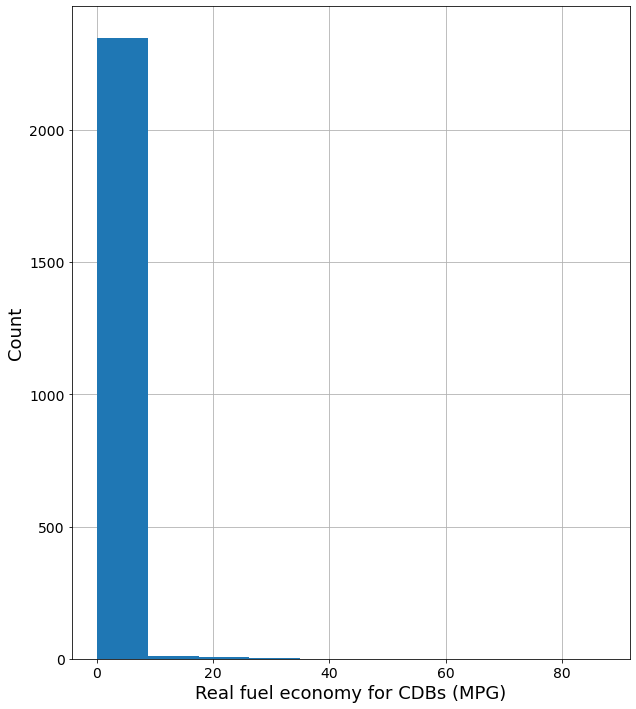

In [3250]:
fig, ax = plt.subplots()
df_conventional['Real_Fuel/energy_economy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real fuel economy for CDBs (MPG)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-economy-CDB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

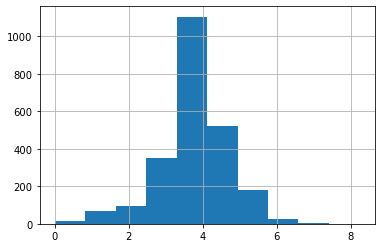

In [3221]:
df_conventional['Fuel/energy_economy'].hist()

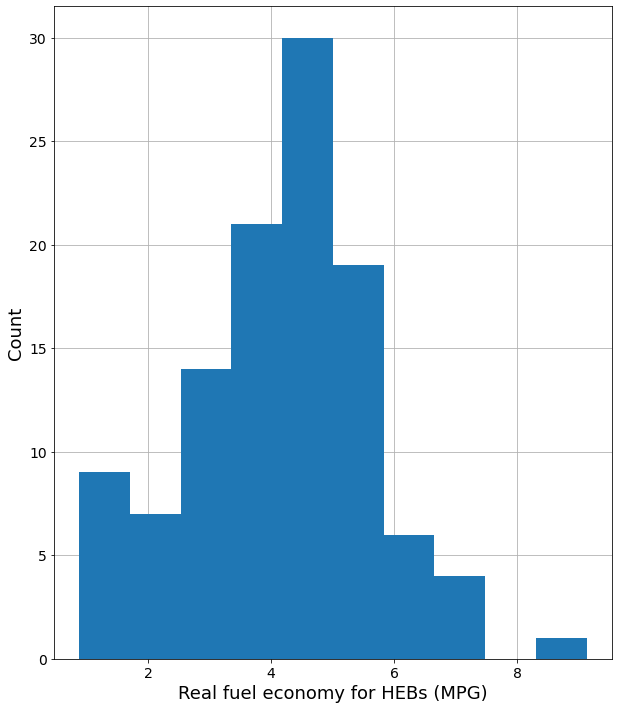

In [3249]:
fig, ax = plt.subplots()
df_hybrid['Real_Fuel/energy_economy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real fuel economy for HEBs (MPG)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-economy-HEB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

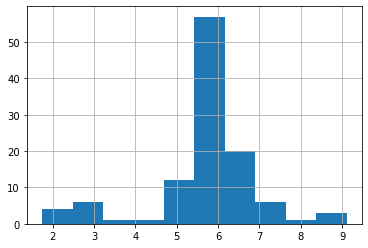

In [3223]:
df_hybrid['Fuel/energy_economy'].hist()

In [3224]:
df_conventional['Fuel/energy_economy'].mean()

3.7480479278770256

In [3225]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.253903059579212

In [3226]:
df_hybrid['Fuel/energy_economy'].mean()

5.735868300405763

In [3227]:
df_hybrid['Real_Fuel/energy_economy'].mean()

4.166555283149985

In [3251]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

<AxesSubplot:>

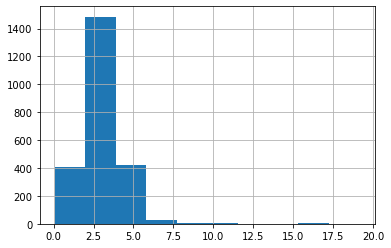

In [3252]:
#df_conventional['Real_Fuel/energy_economy'].hist()

In [3230]:
#df_integrated.to_csv(r'../../results/model_plus_validation_results.csv')

In [3259]:
from sklearn.metrics import mean_squared_error

rmse_conventional = mean_squared_error(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_test = mean_squared_error(test_conventional['Real_Fuel/energy_economy'], test_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_test = mean_squared_error(test_hybrid['Real_Fuel/energy_economy'], test_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_train = mean_squared_error(train_conventional['Real_Fuel/energy_economy'], train_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_train = mean_squared_error(train_hybrid['Real_Fuel/energy_economy'], train_hybrid['Fuel/energy_economy'], squared=False)

In [3260]:
#print("For conventional RMSE total:", rmse_conventional, "test:", rmse_conventional_test, "train": rmse_conventional_train)

In [3261]:
rmse_conventional

1.6463465929775436

In [3262]:
rmse_conventional_test

1.6412418090554437

In [3263]:
rmse_conventional_train

1.6476230152286546

In [3236]:
rmse_hybrid

2.436271190806143

In [3237]:
rmse_hybrid_test

1.9110546647677615

In [3238]:
rmse_hybrid_train

2.555814079417007

In [3172]:
#mse_hybrid = np.square(np.subtract(df_hybrid['Real_Fuel/energy_economy'],df_hybrid['Fuel/energy_economy'])).mean() 
#rmse_hybrid = math.sqrt(mse_hybrid)

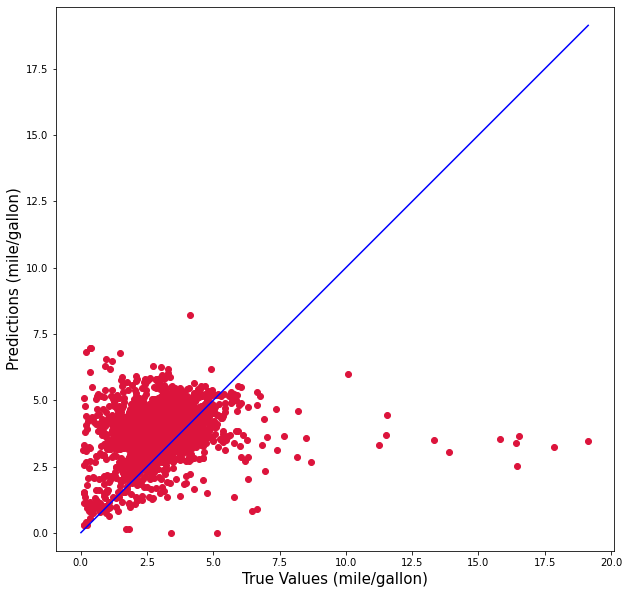

In [3264]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], c='crimson')

p1 = max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Real_Fuel/energy_economy']))
p2 = min(min(df_conventional['Fuel/energy_economy']), min(df_conventional['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (mile/gallon)', fontsize=15)
plt.ylabel('Predictions (mile/gallon)', fontsize=15)
plt.axis('equal')
fig.savefig(r'../../figures/actual-predicted-CDB.png', dpi=400, bbox_inches='tight')
plt.show()

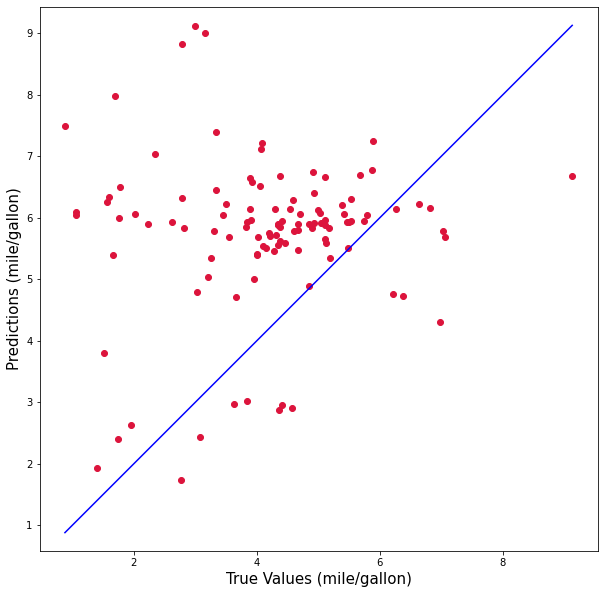

In [3248]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], c='crimson')

p1 = max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Real_Fuel/energy_economy']))
p2 = min(min(df_hybrid['Fuel/energy_economy']), min(df_hybrid['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (mile/gallon)', fontsize=15)
plt.ylabel('Predictions (mile/gallon)', fontsize=15)
plt.axis('equal')
fig.savefig(r'../../figures/actual-predicted-HEB.png', dpi=400, bbox_inches='tight')
plt.show()

In [546]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.260150537747788

In [1443]:
df_conventional['Fuel/energy_economy'].mean()

3.6893323393890034

In [1447]:
df1_vehicles=[3212]

In [1449]:
df_integrated.loc[df_integrated['Vehicle'].isin(df1_vehicles)]

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
2083,3212,2022-04-07,48.619081,conventional,135.018871,29.3,2.777076,4.608153
2084,3212,2022-04-08,24.798524,conventional,76.937812,77.1,3.102516,0.997896
2086,3212,2022-04-11,26.278684,conventional,91.369757,29.5,3.476953,3.097280
2087,3212,2022-04-12,14.405865,conventional,16.616347,10.6,1.153443,1.567580
2089,3212,2022-04-14,35.539471,conventional,154.372203,42.6,4.343683,3.623761
2090,3212,2022-04-15,5.400433,conventional,17.189445,55.9,3.182975,0.307503
2091,3212,2022-04-23,19.701222,conventional,63.446732,33.1,3.220447,1.916820
2092,3212,2022-04-24,19.095716,conventional,63.427457,21.3,3.321554,2.977815
2094,3212,2022-04-26,18.537434,conventional,19.213700,46.2,1.036481,0.415881
2096,3212,2022-04-28,29.401205,conventional,100.280686,60.2,3.410768,1.665792


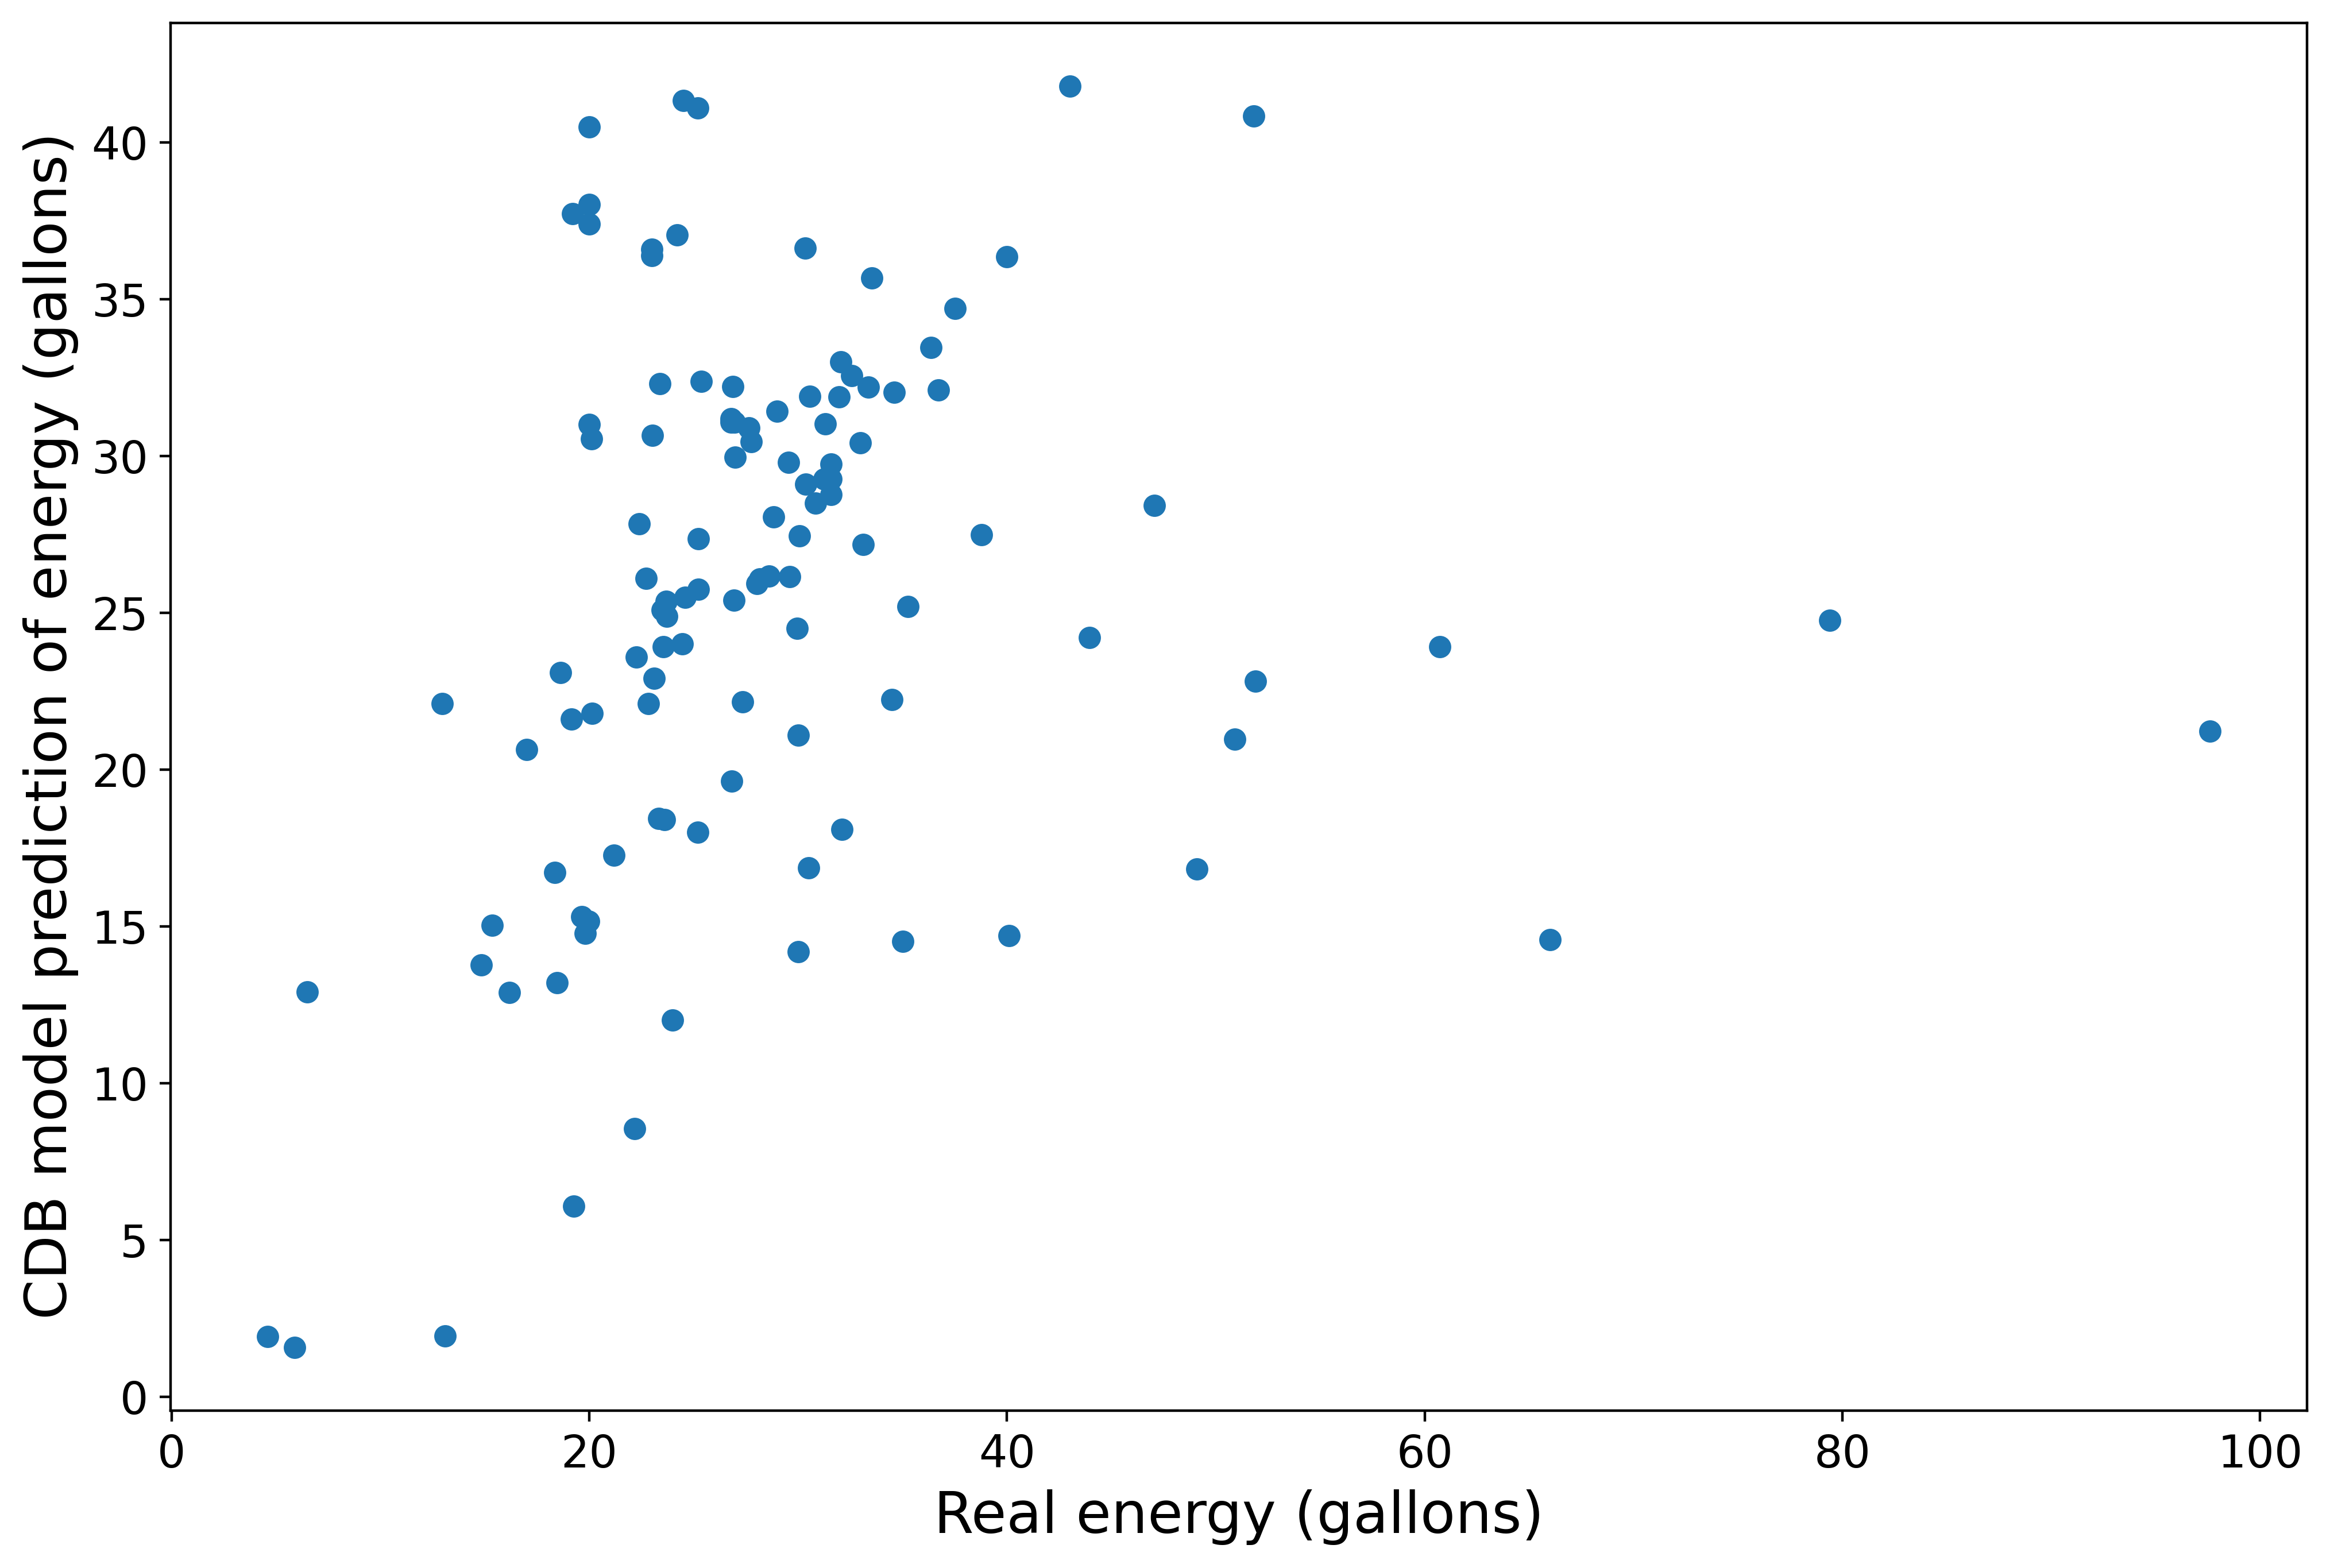

In [3315]:
figure(figsize=(12, 8), dpi=400)
plt.scatter(x=df_hybrid['Real_Energy'], y=df_hybrid['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/beta-estimation.png', dpi=400, bbox_inches='tight')
plt.show()

In [3313]:
X= df_hybrid['Real_Energy']
y= df_hybrid['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              425.5
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    1.33e-39
Time:                        13:15:01   Log-Likelihood:                         -434.81
No. Observations:                 111   AIC:                                      871.6
Df Residuals:                     110   BIC:                                      874.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------